Situação Problema:

Você foi contratado pela empresa S&M Data Analytics para realizar a análise de dados de um
determinado conjunto de dados de uma grande empresa de comércio de produtos eletrônicos.

Nesse conjunto de dados há diversas informações sobre nome dos produtos, nota média dada pelos
clientes, quantidade total de clientes que votaram e se um cliente comprou ou não um produto e diversas
informações relevantes.

Sua tarefa é realizar uma análise exploratória e implementar um algoritmo modelo de Machine
Learning para prever quais clientes são mais propensos a comprar determinados produtos. Para essa tarefa
são necessários realizar as seguintes etapas do processo de descoberta do conhecimento:

In [65]:
# Importando as bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Importa o algoritmo da árvore de decisão
from sklearn import tree # Importa o elemento tree para plotagem da árvore

In [68]:
# Criação do conjunto de dados
dados = pd.DataFrame ({ 
    'Produtos': [
        
    'Televisão', 'Celular', 'Cafeteira', 'Televisão', 'Videogame',
    'Celular', 'iPod', 'Notebook', 'Videogame', 'Televisão',
    'Celular', 'Televisão', 'Notebook', 'Televisão', 'Celular',
    'iPod', 'Notebook', 'Notebook', 'Notebook', 'Notebook',
    'Televisão', 'iPod', 'iPod', 'Cafeteira', 'Celular',
    'Celular', 'Celular', 'iPod', 'Videogame', 'iPod',
    'Celular', 'Televisão', 'iPod', 'Cafeteira', 'Televisão',
    'Celular', 'Cafeteira', 'Cafeteira', 'Televisão', 'Celular',
    'iPod', 'Videogame', 'Televisão', 'Celular', 'Televisão',
    'Videogame', 'Televisão', 'Notebook', 'Videogame', 'Notebook',
    'Videogame', 'Videogame', 'iPod', 'Cafeteira', 'Televisão',
    'Videogame', 'Celular', 'iPod', 'Celular', 'Videogame',
    'iPod', 'Televisão', 'Cafeteira', 'Notebook', 'Notebook',
    'Televisão', 'Videogame', 'Celular', 'Televisão', 'iPod',
    'Televisão', 'Videogame', 'Celular', 'Videogame', 'Cafeteira',
    'iPod', 'Videogame', 'Celular', 'Televisão', 'Celular',
    'Celular', 'Notebook', 'iPod', 'Celular', 'Cafeteira',
    'Notebook', 'iPod', 'Notebook', 'Videogame', 'Celular',
    'Videogame', 'iPod', 'Notebook', 'Notebook', 'Videogame',
    'iPod', 'Celular', 'Televisão', 'Notebook', 'iPod'
    ],

    'Notas': [
        
    3.04, 3.46, 3.25, 3.77, 5.0, 3.98, 3.5, 4.76, 3.94, 4.68,
    4.43, 3.14, 4.42, 3.14, 3.62, 4.1, 3.93, 4.61, 4.18, 3.11,
    4.24, 4.95, 4.49, 3.6, 4.92, 3.12, 4.89, 3.76, 3.76, 4.94,
    3.02, 4.12, 3.23, 4.45, 4.08, 4.0, 3.31, 3.04, 4.8, 4.31,
    3.82, 3.45, 3.05, 3.69, 3.45, 4.98, 4.96, 3.75, 5.0, 3.39,
    3.33, 4.95, 4.8, 4.24, 4.97, 4.23, 4.68, 3.51, 3.16, 4.99,
    4.24, 3.49, 4.11, 4.68, 4.39, 3.71, 4.55, 3.52, 4.47, 4.23,
    4.01, 4.67, 3.79, 3.04, 3.44, 3.78, 3.87, 3.69, 4.6, 4.42,
    3.38, 4.33, 3.81, 4.36, 4.29, 4.14, 4.12, 3.7, 4.81, 3.84,
    3.99, 4.64, 4.35, 4.15, 4.78, 4.44, 4.66, 4.33, 3.3, 4.08
    ],
    
    'Avaliações': [
        
    29, 3872, 1187, 4097, 4738, 1413, 1907, 3857, 2800, 2600,
    2748, 4599, 79, 1428, 4399, 4977, 3745, 4801, 1425, 4620,
    1744, 1879, 230, 4841, 3679, 3649, 2773, 4965, 4780, 3070,
    2544, 1946, 1992, 4236, 4613, 245, 556, 4403, 3376, 1786,
    2357, 3299, 3162, 2385, 2895, 4566, 950, 2463, 2986, 1489,
    1936, 4969, 3537, 3065, 394, 1556, 4333, 10, 4301, 1779,
    1435, 229, 1075, 1577, 1408, 380, 4339, 407, 1989, 3244,
    3651, 3901, 2319, 4133, 16, 3113, 1887, 4418, 4323, 2463,
    583, 2910, 4457, 798, 1358, 2308, 258, 1913, 2190, 3698,
    1707, 2754, 1558, 1311, 1713, 1372, 1690, 3364, 1825, 533
    ],
    
    'Comprado': [
        
    1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
    0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
    0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
    1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
    0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
    0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
    0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
    1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
    1, 1, 0, 0, 1, 0, 1, 1, 1, 0
    ]
})


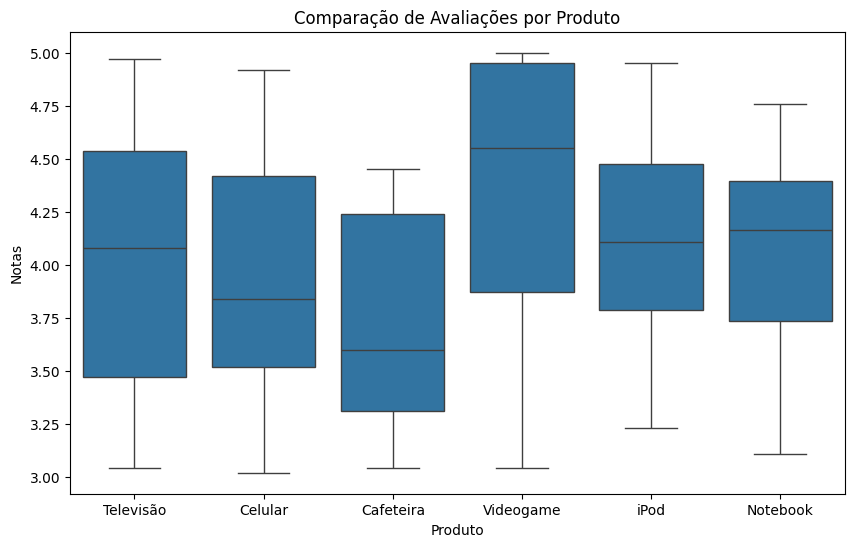

In [69]:
# Criação do boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x='Produtos', y='Notas', data=dados)

# Configurações do gráfico
plt.title('Comparação de Avaliações por Produto')
plt.ylabel('Notas')
plt.xlabel('Produto')

# Mostrar gráfico
plt.show()


------------------------------- Árvore de Decisão do Produto (product) ------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.5
Precision Score: 1.0
Recall Score: 0.3333333333333333
Confusion Matrix: [[1 0]
 [2 1]]

Visualização da Árvore:

------------------------------- Árvore de Decisão do Produto (product) ------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.6
F1 Score: 0.6666666666666666
Precision Score: 0.5
Recall Score: 1.0
Confusion Matrix: [[1 2]
 [0 2]]

Visualização da Árvore:

------------------------------- Árvore de Decisão do Produto (product) ------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[1 0]
 [1 0]]

Visualização da Árvore:

------------------------------- Árvore de Decisão do Produto (product) ------------------------------

Avaliação do Modelo: 

Accuracy Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 

C:\Users\dsadm\AppData\Local\Temp\ipykernel_6716\564410628.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Comprado'] = product_df['Comprado'].replace([1,0], ['Comprou', 'Não Comprou'])
C:\Users\dsadm\AppData\Local\Temp\ipykernel_6716\564410628.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Comprado'] = product_df['Comprado'].replace([1,0], ['Comprou', 'Não Comprou'])
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision 

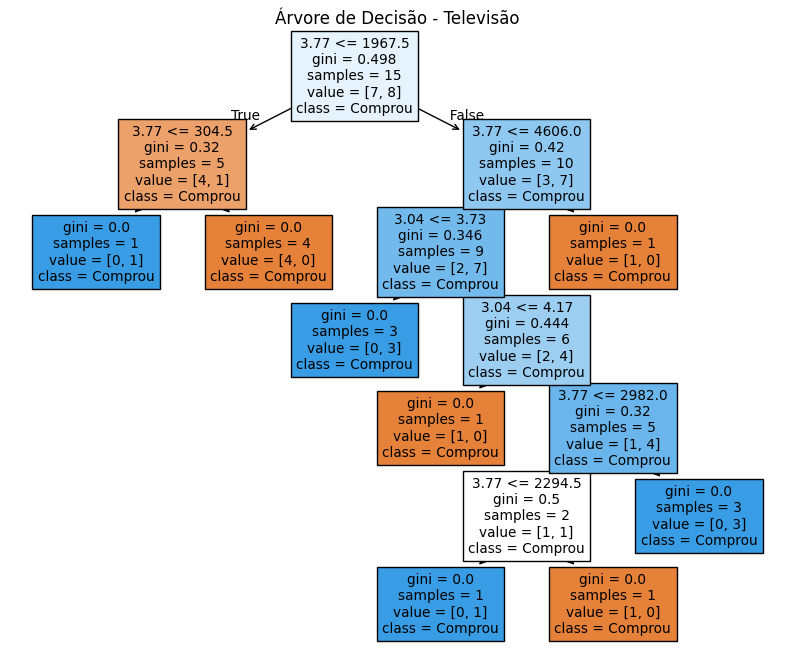

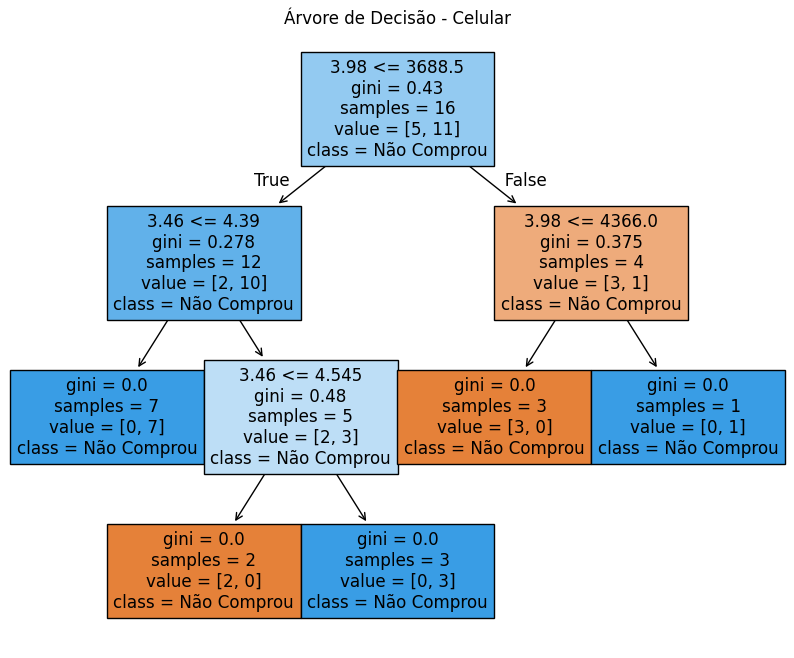

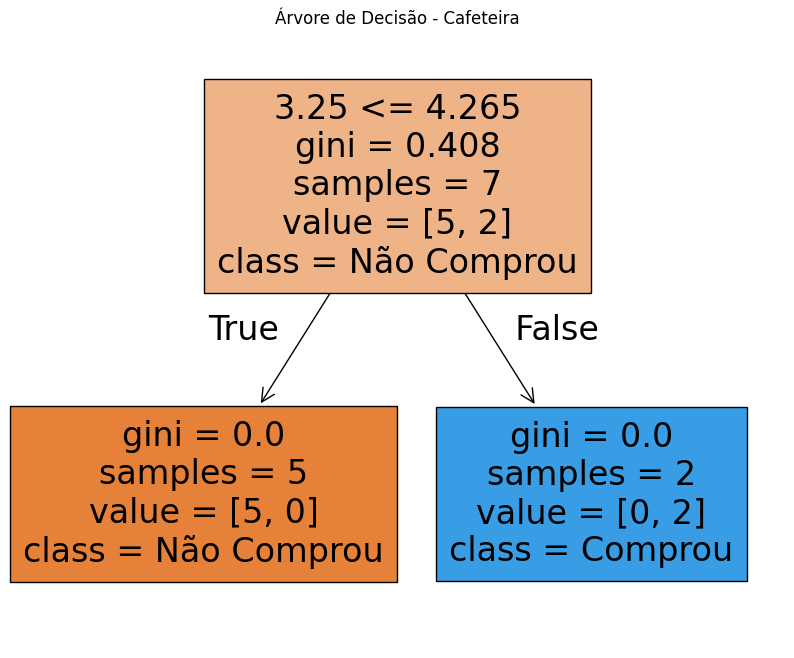

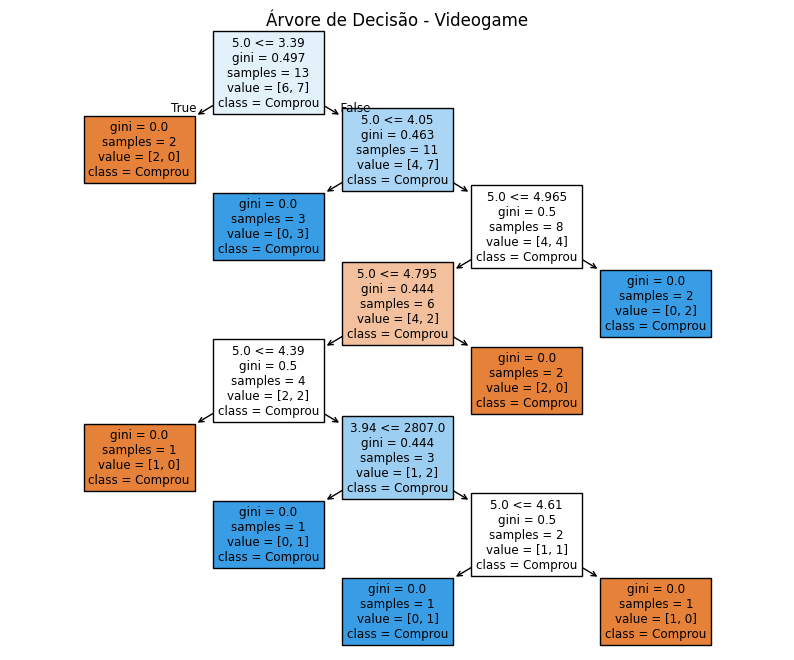

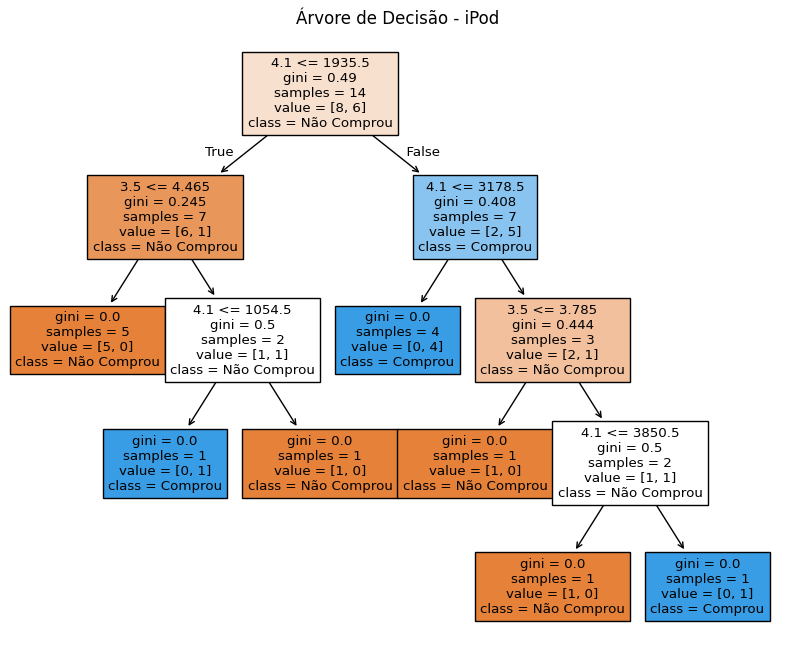

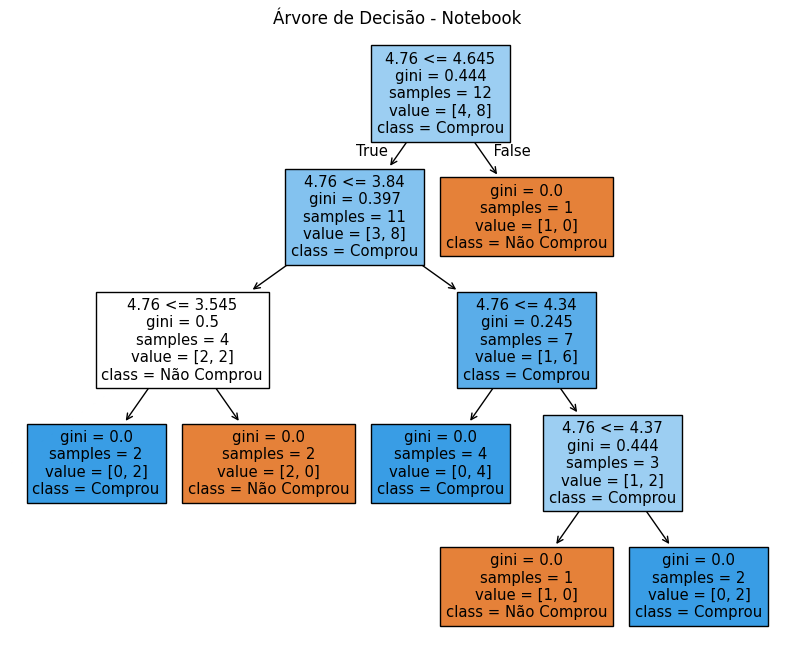

In [84]:
products = dados['Produtos'].unique()
for product in products:
        
    print(f'\n------------------------------- Árvore de Decisão do Produto (product) ------------------------------\n')
    
    product_df = dados.loc[dados['Produtos'] == product]
    
    x= product_df.drop(['Comprado', 'Produtos'], axis=1)
    y= product_df['Comprado']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    dtc = DecisionTreeClassifier()
    model = dtc.fit(x_train, y_train)
    y_pred = dtc.predict(x_test)
    
    print('Avaliação do Modelo: \n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test, y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')
    
    print('\nVisualização da Árvore:')
    
    product_df['Comprado'] = product_df['Comprado'].replace([1,0], ['Comprou', 'Não Comprou'])
    
    fig = plt.figure(figsize=(10, 8))
    
    tree.plot_tree(model, feature_names=product_df['Notas'].tolist(), class_names=product_df['Comprado'].tolist(), filled=True)
    plt.title(f'Árvore de Decisão - {product}')
    